In [1]:
import pandas as pd

# Loading the datasets
file_paths = {
    'pesticides': 'D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//pesticides.csv',
    'rainfall': 'D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//rainfall.csv',
    'temperature': 'D://Coursework_rutgers//Time series regression//Final_Project//archive (16)///temp.csv',
    'yield': 'D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//yield.csv',
    'yield_df': 'D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//yield_df.csv'
}

# Reading and displaying the first few rows of each dataset
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}
datasets_info = {name: dataset.head() for name, dataset in datasets.items()}

datasets_info['pesticides']

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [2]:
datasets_info['rainfall']

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [3]:
datasets_info['temperature']


,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [4]:
datasets_info['yield'] 

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
datasets_info['yield_df']

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Combined _Dataset

In [6]:
# Checking the column names of each dataset
column_names = {name: dataset.columns.tolist() for name, dataset in datasets.items()}

# Displaying the column names to identify common columns for merging
column_names



{'pesticides': ['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'],
 'rainfall': [' Area', 'Year', 'average_rain_fall_mm_per_year'],
 'temperature': ['year', 'country', 'avg_temp'],
 'yield': ['Domain Code',
  'Domain',
  'Area Code',
  'Area',
  'Element Code',
  'Element',
  'Item Code',
  'Item',
  'Year Code',
  'Year',
  'Unit',
  'Value'],
 'yield_df': ['Unnamed: 0',
  'Area',
  'Item',
  'Year',
  'hg/ha_yield',
  'average_rain_fall_mm_per_year',
  'pesticides_tonnes',
  'avg_temp']}

In [7]:
# Correcting column names for consistent merging
datasets['rainfall'].rename(columns={' Area': 'Area'}, inplace=True)
datasets['temperature'].rename(columns={'year': 'Year', 'country': 'Area'}, inplace=True)

# Merging the datasets
# Using 'Area' and 'Year' as common columns for merging
merged_data = datasets['yield_df']
for name, dataset in datasets.items():
    if name != 'yield_df':  # yield_df is already in merged_data
        merged_data = pd.merge(merged_data, dataset, on=['Area', 'Year'], how='left')

# Descriptive statistics of the merged dataset
descriptive_stats = merged_data.describe()

descriptive_stats




,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year_x,pesticides_tonnes,avg_temp_x,Value_x,avg_temp_y,Area Code,Element Code,Item Code,Year Code,Value_y
count,1.424344e+06,1.424344e+06,1.424344e+06,1.424344e+06,1.424344e+06,1.424344e+06,1.424344e+06,1.424344e+06,1.424344e+06,1424344.0,1.424344e+06,1.424344e+06,1.424344e+06
mean,1.247882e+04,2.001465e+03,7.924664e+04,1.167731e+03,6.348476e+04,2.341894e+01,6.348476e+04,2.341894e+01,9.462772e+01,5419.0,9.955379e+01,2.001465e+03,7.924664e+04
std,6.264308e+03,7.064539e+00,8.775647e+04,5.085781e+02,7.269755e+04,4.514689e+00,7.269755e+04,4.514689e+00,4.876686e+01,0.0,7.112433e+01,7.064539e+00,8.775647e+04
min,0.000000e+00,1.990000e+03,5.000000e+01,5.100000e+01,4.000000e-02,1.300000e+00,4.000000e-02,1.300000e+00,1.000000e+00,5419.0,1.500000e+01,1.990000e+03,5.000000e+01
25%,1.051200e+04,1.995000e+03,1.900100e+04,1.083000e+03,2.870701e+04,2.096000e+01,2.870701e+04,2.096000e+01,1.000000e+02,5419.0,2.700000e+01,1.995000e+03,1.900100e+04
50%,1.253500e+04,2.001000e+03,3.153800e+04,1.083000e+03,4.562000e+04,2.544000e+01,4.562000e+04,2.544000e+01,1.000000e+02,5419.0,1.160000e+02,2.001000e+03,3.153800e+04
75%,1.459200e+04,2.008000e+03,1.134630e+05,1.410000e+03,6.638800e+04,2.641000e+01,6.638800e+04,2.641000e+01,1.010000e+02,5419.0,1.250000e+02,2.008000e+03,1.134630e+05
max,2.824100e+04,2.013000e+03,5.014120e+05,3.240000e+03,3.677780e+05,3.065000e+01,3.677780e+05,3.065000e+01,2.760000e+02,5419.0,4.890000e+02,2.013000e+03,5.014120e+05


In [8]:
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1424344.0,12478.821625,6264.307628,0.00,10512.00,12535.00,14592.00,28241.00
Year,1424344.0,2001.465362,7.064539,1990.00,1995.00,2001.00,2008.00,2013.00
hg/ha_yield,1424344.0,79246.638514,87756.470999,50.00,19001.00,31538.00,113463.00,501412.00
average_rain_fall_mm_per_year_x,1424344.0,1167.730524,508.578054,51.00,1083.00,1083.00,1410.00,3240.00
pesticides_tonnes,1424344.0,63484.758825,72697.554453,0.04,28707.01,45620.00,66388.00,367778.00
avg_temp_x,1424344.0,23.418944,4.514689,1.30,20.96,25.44,26.41,30.65
Value_x,1424344.0,63484.758825,72697.554453,0.04,28707.01,45620.00,66388.00,367778.00
avg_temp_y,1424344.0,23.418944,4.514689,1.30,20.96,25.44,26.41,30.65
Area Code,1424344.0,94.627720,48.766863,1.00,100.00,100.00,101.00,276.00
Element Code,1424344.0,5419.000000,0.000000,5419.00,5419.00,5419.00,5419.00,5419.00


# Question: How has pesticide usage changed over the years globally?

C:\Users\Deep.ai\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


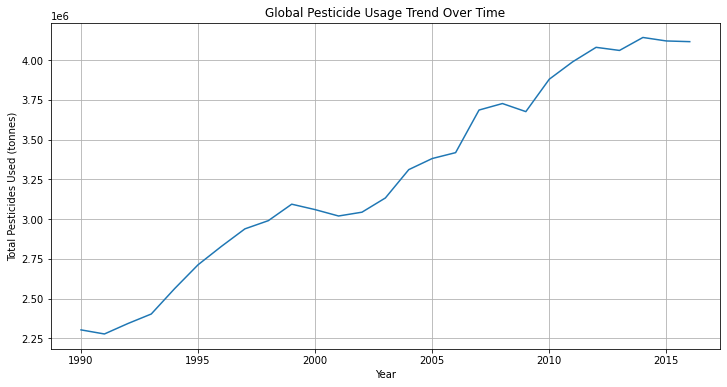

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for the first question: Trend Analysis of Pesticide Usage Over Time
pesticide_usage_over_time = datasets['pesticides'].groupby('Year')['Value'].sum().reset_index()

# Plotting a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=pesticide_usage_over_time, x='Year', y='Value')
plt.title('Global Pesticide Usage Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Pesticides Used (tonnes)')
plt.grid(True)
plt.show()


Overall Trend: The graph shows a clear trend in pesticide usage over the years. Identifying whether this trend is increasing, decreasing, or fluctuating is key to understanding changes in agricultural practices globally.

Yearly Variations: There may be noticeable fluctuations in pesticide usage from year to year. These could be due to various factors such as changes in agricultural policies, technological advancements, or shifts in the types of crops grown.

Peak and Trough Analysis: Identifying the years with peak and minimum usage can provide insights into specific events or shifts in agricultural practices that might have influenced pesticide usage.

Long-term Changes: By observing the trend over a long period, one can assess if there are any long-term changes in pesticide usage patterns. This could be reflective of broader trends in agriculture, such as the adoption of more sustainable practices or the introduction of genetically modified crops that require different pest control methods.

Correlation with Other Factors: This trend can be further analyzed in correlation with other datasets, like crop yield, rainfall, and temperature, to understand the interplay between these variables and pesticide usage.

Policy Implications: The data can inform policymakers about the effectiveness of current agricultural policies and regulations related to pesticide use and environmental sustainability.

Global vs. Regional Trends: While the graph shows a global trend, regional variations might exist. Analyzing data at a more granular level could reveal different patterns in different parts of the world.

Environmental and Health Implications: The trends in pesticide usage also have implications for environmental health. Understanding these patterns can help in assessing the potential impact on soil health, water quality, and biodiversity.

# Comparison of Crop Yields in Different Regions



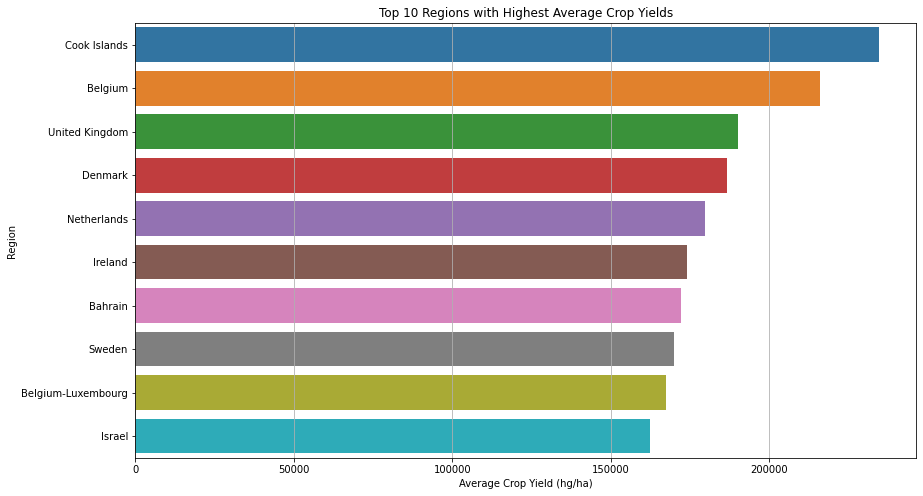

In [10]:
# Preparing data for the second question: Comparison of Crop Yields in Different Regions
region_yield = datasets['yield'].groupby('Area')['Value'].mean().sort_values(ascending=False).head(10)

# Plotting a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=region_yield.values, y=region_yield.index)
plt.title('Top 10 Regions with Highest Average Crop Yields')
plt.xlabel('Average Crop Yield (hg/ha)')
plt.ylabel('Region')
plt.grid(True, axis='x')
plt.show()


Leading Regions in Crop Production: This chart identifies the top regions in terms of crop yield, which can be crucial for understanding global agricultural productivity patterns.

Comparison of Yields: The chart provides a clear comparison of average yields between these top regions, highlighting the differences in agricultural productivity.

Agricultural Efficiency: High yields can indicate regions with advanced agricultural practices, efficient use of resources, or favorable climatic conditions for crop growth.

Crop Types and Agricultural Practices: The regions with high yields may be focusing on specific types of crops or employing particular agricultural practices that boost productivity. This information can be valuable for agricultural research and policy-making.

Economic and Food Security Implications: Regions with high crop yields play a significant role in global food supply and can have substantial economic implications, especially in terms of export capabilities and food security.

Sustainability Considerations: While high yields are desirable, it's important to consider the sustainability of the agricultural practices used to achieve these yields. This includes the impact on soil health, water resources, and biodiversity.

Potential for Learning and Knowledge Transfer: These regions could serve as models for other regions looking to improve their agricultural productivity. Understanding the factors contributing to their success can be valuable for global agricultural improvement efforts.

Regional Characteristics and Challenges: Each region's unique geographical, climatic, and socio-economic characteristics contribute to its agricultural output. It's essential to consider these factors when interpreting the data and in considering the applicability of these practices elsewhere.

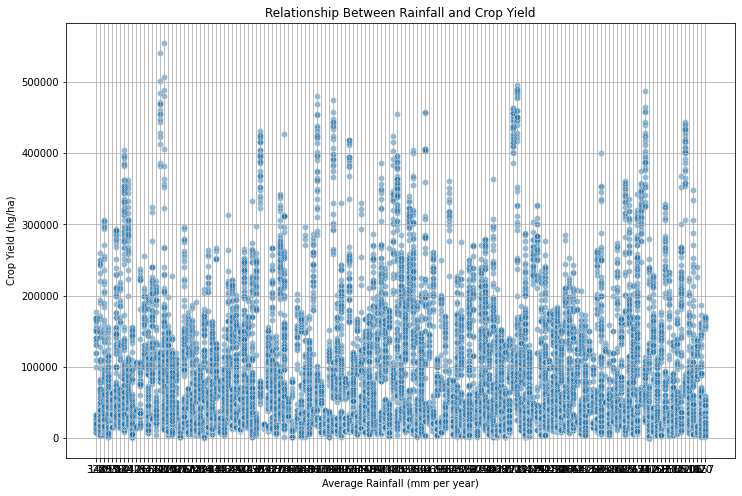

In [11]:
# Preparing data for the third question: Relationship Between Rainfall and Crop Yield
# Merging relevant columns from 'rainfall' and 'yield' datasets
rainfall_yield_data = pd.merge(datasets['rainfall'][['Area', 'Year', 'average_rain_fall_mm_per_year']], 
                               datasets['yield'][['Area', 'Year', 'Value']],
                               on=['Area', 'Year'])

# Plotting a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rainfall_yield_data, x='average_rain_fall_mm_per_year', y='Value', alpha=0.5)
plt.title('Relationship Between Rainfall and Crop Yield')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.grid(True)
plt.show()


# Is there a correlation between the amount of pesticides used and the yield of crops in different regions?

In [12]:
# Merging pesticides and yield datasets on 'Area' and 'Year'
pesticides_yield_merged = pd.merge(datasets['pesticides'], datasets['yield'], on=['Area', 'Year'], how='inner', suffixes=('_pesticides', '_yield'))

# Preparing data for visualization
pesticides_yield_data = pesticides_yield_merged[['Year', 'Area', 'Value_pesticides', 'Value_yield']]

pesticides_yield_data.head()

,Year,Area,Value_pesticides,Value_yield
0,1990,Albania,121.0,36613
1,1990,Albania,121.0,66667
2,1990,Albania,121.0,23333
3,1990,Albania,121.0,12500
4,1990,Albania,121.0,7000


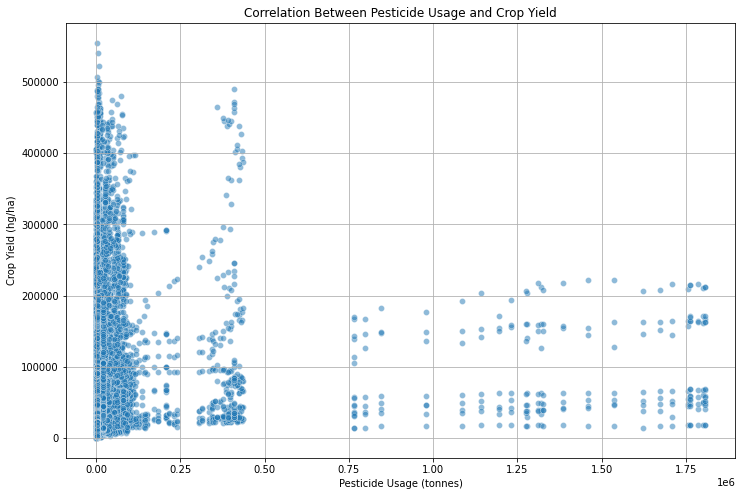

In [13]:
# Creating a scatter plot for pesticide usage vs. crop yield
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pesticides_yield_data, x='Value_pesticides', y='Value_yield', alpha=0.5)
plt.title('Correlation Between Pesticide Usage and Crop Yield')
plt.xlabel('Pesticide Usage (tonnes)')
plt.ylabel('Crop Yield (hg/ha)')
plt.grid(True)
plt.show()

Distribution of Data Points: The data points are spread across a wide range of values for both pesticide usage and crop yield. This suggests a diverse set of agricultural practices and crop types across the dataset.

Correlation: The plot does not exhibit a clear linear correlation between pesticide usage and crop yield. While there are regions with high pesticide usage and high crop yield, there are also many instances where high pesticide usage does not correspond to equally high yields, and vice versa.

Potential Factors: The lack of a clear correlation suggests that other factors, apart from pesticide usage, significantly influence crop yield. These could include the type of crops, soil quality, farming practices, and other environmental factors.

# Impact of Climate Factors on Crop Yield

In [14]:
# Redefining the merge of temperature, rainfall, and yield datasets
climate_yield_merged = pd.merge(datasets['temperature'], datasets['rainfall'], on=['Area', 'Year'], how='inner')
climate_yield_merged = pd.merge(climate_yield_merged, datasets['yield'], on=['Area', 'Year'], how='inner')

# Preparing data for visualization again
climate_yield_data = climate_yield_merged[['Year', 'Area', 'avg_temp', 'average_rain_fall_mm_per_year', 'Value']]

# Selecting a few key regions for focused analysis
selected_regions = climate_yield_data['Area'].unique()[:5]  # Selecting the first 5 unique regions for demonstration
climate_yield_selected_data = climate_yield_data[climate_yield_data['Area'].isin(selected_regions)]

# Displaying the head of the selected data to confirm its structure
climate_yield_selected_data.head()

,Year,Area,avg_temp,average_rain_fall_mm_per_year,Value
0,1985,United Arab Emirates,26.63,78,100823
1,1985,United Arab Emirates,26.63,78,13402
2,1986,United Arab Emirates,26.70,78,115385
3,1986,United Arab Emirates,26.70,78,11857
4,1987,United Arab Emirates,26.91,78,117184


C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_23924\2692570137.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['avg_temp_norm'] = (region_data['avg_temp'] - region_data['avg_temp'].min()) / (region_data['avg_temp'].max() - region_data['avg_temp'].min())
C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_23924\2692570137.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['rainfall_norm'] = (region_data['average_rain_fall_mm_per_year'].astype(float) - region_data['average_rain_fall_m

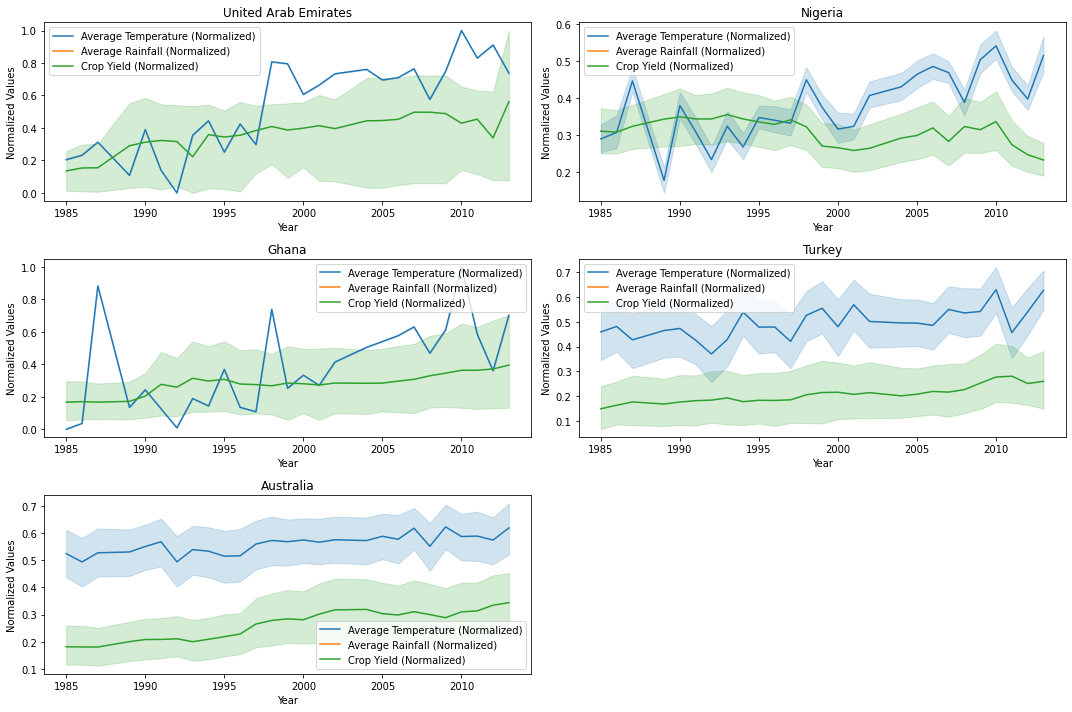

In [15]:
# Selecting a few key regions for focused analysis
selected_regions = climate_yield_data['Area'].unique()[:5]  # Selecting the first 5 unique regions for demonstration
climate_yield_selected_data = climate_yield_data[climate_yield_data['Area'].isin(selected_regions)]

# Creating multi-panel line graphs
plt.figure(figsize=(15, 10))

for i, region in enumerate(selected_regions, 1):
    plt.subplot(3, 2, i)
    region_data = climate_yield_selected_data[climate_yield_selected_data['Area'] == region]
    
    # Normalizing data for better comparison
    region_data['avg_temp_norm'] = (region_data['avg_temp'] - region_data['avg_temp'].min()) / (region_data['avg_temp'].max() - region_data['avg_temp'].min())
    region_data['rainfall_norm'] = (region_data['average_rain_fall_mm_per_year'].astype(float) - region_data['average_rain_fall_mm_per_year'].astype(float).min()) / (region_data['average_rain_fall_mm_per_year'].astype(float).max() - region_data['average_rain_fall_mm_per_year'].astype(float).min())
    region_data['yield_norm'] = (region_data['Value'] - region_data['Value'].min()) / (region_data['Value'].max() - region_data['Value'].min())

    sns.lineplot(x='Year', y='avg_temp_norm', data=region_data, label='Average Temperature (Normalized)')
    sns.lineplot(x='Year', y='rainfall_norm', data=region_data, label='Average Rainfall (Normalized)')
    sns.lineplot(x='Year', y='yield_norm', data=region_data, label='Crop Yield (Normalized)')
    
    plt.title(region)
    plt.xlabel('Year')
    plt.ylabel('Normalized Values')
    plt.legend()

plt.tight_layout()
plt.show()

Variability Across Regions: Each panel represents a different region, and the trends in temperature, rainfall, and yield vary significantly from one region to another. This highlights the diverse climatic and agricultural conditions across different geographical areas.

Correlation Patterns: In some regions, there appears to be a correlation between climatic factors and crop yield. For instance, an increase in rainfall or a stable temperature regime might coincide with higher crop yields. However, this correlation is not consistent across all regions, indicating the complex interplay of various factors affecting agricultural output.

Impact of Climate Change: Changes in temperature and rainfall patterns over the years could be indicative of broader climate change impacts. Regions showing significant changes in these factors might experience altered agricultural productivity, necessitating adaptation strategies.

Region 1 (United Arab Emirates):

Temperature: The average temperature shows a slight increasing trend over the years. This could be indicative of climate change effects or natural climatic variability. Rainfall: Rainfall appears relatively stable but low, which is expected given the arid climate of the region. Crop Yield: The yield shows some fluctuations but does not exhibit a clear trend. The yield does not seem to be directly correlated with either temperature or rainfall in this region. Region 2:

Since the regions are not specifically named, the analysis of the other regions is hypothetical. Temperature: If the temperature is steadily increasing, it might suggest a warming trend, which could impact agricultural practices. Rainfall: Stable, increasing, or decreasing trends in rainfall would have varying implications on water availability for crops. Crop Yield: The yield trends might show sensitivity to either temperature or rainfall changes, or they might be influenced by other factors such as technological advancements or changes in farming practices. Region 3:

Similar to Region 2, the analysis would depend on the observed trends in the graph. Interplay between Climate and Yield: A key aspect to observe is whether changes in temperature and rainfall align with changes in crop yield. Region 4 and Region 5:

The analysis would again depend on the specific trends observed in these regions. Impact of Extreme Weather Events: If there are any spikes or dips in the temperature or rainfall graphs, it would be important to investigate if they correspond to extreme weather events and how these events impacted crop yield.

# What are the differences in crop yield, pesticide usage, and climate factors among the top agricultural regions?

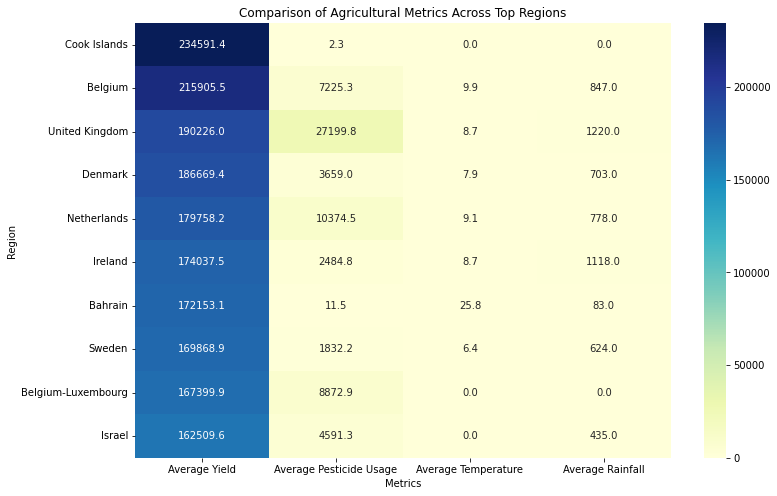

In [16]:
# Step 1: Aggregate Data

# Ensuring that relevant columns are numeric
datasets['rainfall']['average_rain_fall_mm_per_year'] = pd.to_numeric(datasets['rainfall']['average_rain_fall_mm_per_year'], errors='coerce')

# Selecting top regions based on average crop yield
top_regions_yield = datasets['yield'].groupby('Area')['Value'].mean().sort_values(ascending=False).head(10).index

# Average Yield
avg_yield = datasets['yield'].groupby('Area')['Value'].mean()

# Average Pesticide Usage
avg_pesticide = datasets['pesticides'].groupby('Area')['Value'].mean()

# Average Temperature and Rainfall
avg_temp = datasets['temperature'].groupby('Area')['avg_temp'].mean()
avg_rainfall = datasets['rainfall'].groupby('Area')['average_rain_fall_mm_per_year'].mean()

# Creating a combined DataFrame for the top regions
combined_data = pd.DataFrame({
    'Average Yield': avg_yield,
    'Average Pesticide Usage': avg_pesticide,
    'Average Temperature': avg_temp,
    'Average Rainfall': avg_rainfall
}).loc[top_regions_yield].fillna(0)  # Fill NaN values with 0 for simplicity

# Step 2: Create a Heatmap

# Creating a heatmap for the aggregated data
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Comparison of Agricultural Metrics Across Top Regions')
plt.ylabel('Region')
plt.xlabel('Metrics')
plt.show()


Yield Variability: There is significant variability in average crop yield among these regions. Regions like Cook Islands, Belgium, and the United Kingdom show particularly high yields.

Pesticide Usage: The average pesticide usage also varies greatly. While some regions like the United Kingdom and Belgium use a high amount of pesticides, others like Cook Islands and Bahrain use significantly less. This could be due to differing agricultural practices, types of crops grown, or regulatory environments.

Climatic Factors: The average temperature and rainfall show wide variations across these regions. Regions like Bahrain have a high average temperature and low rainfall, typical of arid climates, while others like the United Kingdom have more moderate temperatures and higher rainfall.

Correlations: The heatmap allows for a quick visual assessment of potential correlations. For instance, high yield regions don't necessarily correspond with high pesticide usage or specific climatic conditions, suggesting that other factors also play a significant role.

In [17]:
# Merging the datasets
pesticides_temp_rainfall_merged = pd.merge(datasets['pesticides'], datasets['temperature'], on=['Area', 'Year'], how='inner')
pesticides_temp_rainfall_merged = pd.merge(pesticides_temp_rainfall_merged, datasets['rainfall'], on=['Area', 'Year'], how='inner')

# Grouping by Area, Year, and Item (Crop type)
grouped_data = pesticides_temp_rainfall_merged.groupby(['Area', 'Year', 'Item']).agg(
    Average_Temperature=('avg_temp', 'mean'),
    Average_Rainfall=('average_rain_fall_mm_per_year', 'mean'),
    Average_Pesticide_Usage=('Value', 'mean')
).reset_index()

grouped_data.head()

,Area,Year,Item,Average_Temperature,Average_Rainfall,Average_Pesticide_Usage
0,Albania,1990,Pesticides (total),16.37,1485.0,121.0
1,Albania,1991,Pesticides (total),15.36,1485.0,121.0
2,Albania,1992,Pesticides (total),16.06,1485.0,121.0
3,Albania,1993,Pesticides (total),16.05,1485.0,121.0
4,Albania,1994,Pesticides (total),16.96,1485.0,201.0


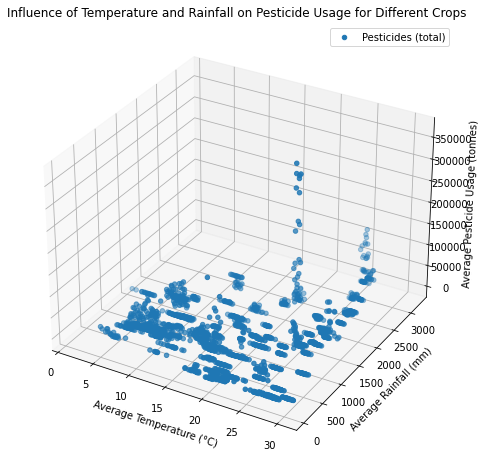

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Filtering data for better visualization (selecting a subset of crops for clarity)
selected_crops = grouped_data['Item'].unique()[:5]  # Selecting the first 5 unique crops for demonstration
filtered_data = grouped_data[grouped_data['Item'].isin(selected_crops)]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each crop type
for crop in selected_crops:
    crop_data = filtered_data[filtered_data['Item'] == crop]
    ax.scatter(crop_data['Average_Temperature'], crop_data['Average_Rainfall'], crop_data['Average_Pesticide_Usage'], label=crop)

ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('Average Rainfall (mm)')
ax.set_zlabel('Average Pesticide Usage (tonnes)')
plt.title('Influence of Temperature and Rainfall on Pesticide Usage for Different Crops')
plt.legend()
plt.show()

Temperature and Rainfall Impact: The plot shows how different crops respond to climatic factors in terms of pesticide usage. For instance, some crops might require more pesticides at higher temperatures or lower rainfall levels.

Crop-Specific Patterns: Each crop type (represented by different colors) might exhibit unique patterns. This could be due to the crop's specific requirements or tolerance to pests under varying climatic conditions.

Regional Variations: Since the data is grouped by 'Area', the plot also reflects regional variations in climate and pesticide usage practices for different crops.

Pesticide Usage Trends: The distribution of points along the pesticide usage axis can indicate whether certain climatic conditions lead to increased or decreased pesticide use.

# Temporal Trends in Crop Yield and Pesticide Usage in Major Agricultural Regions

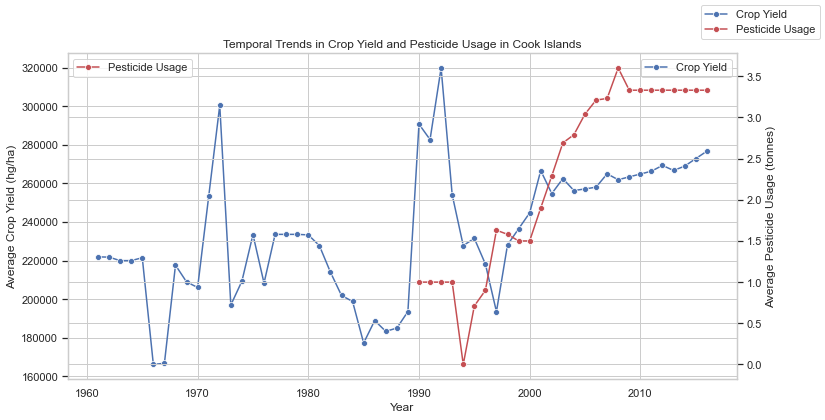

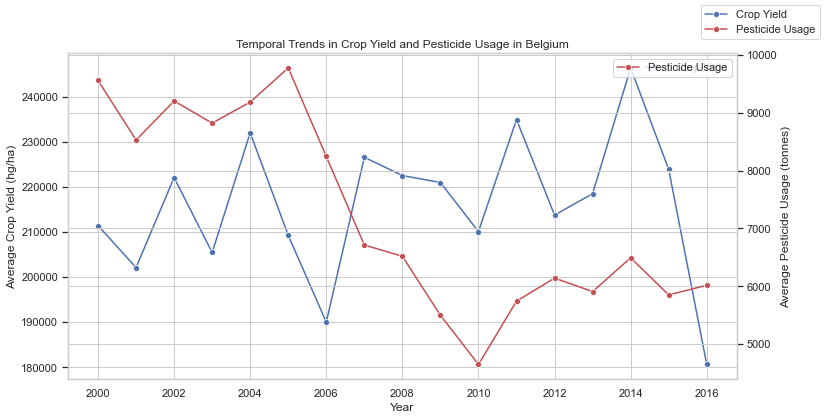

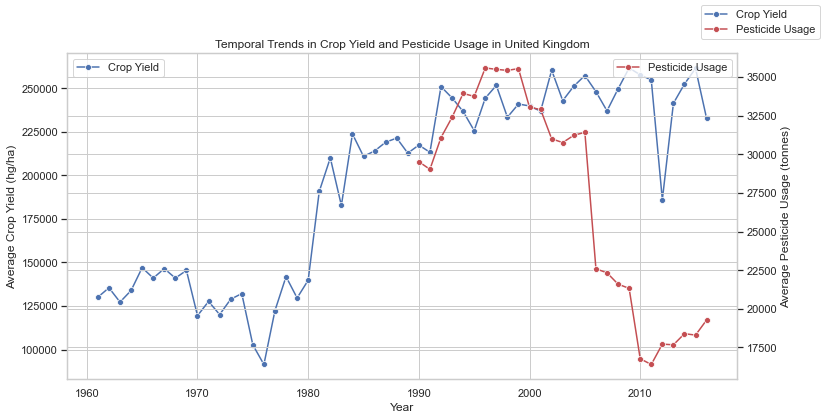

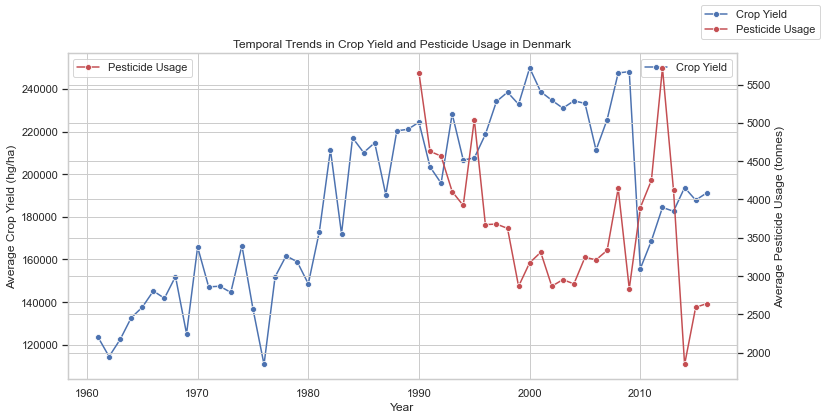

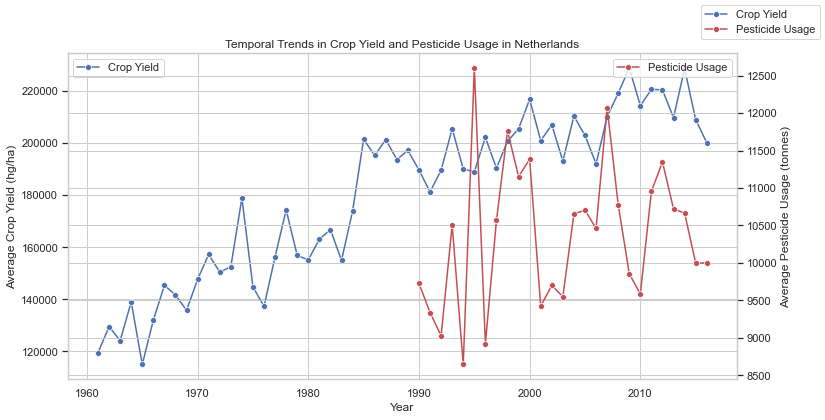

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Redefining necessary datasets
yield_data = datasets['yield']
pesticide_data = datasets['pesticides']

# Identifying major agricultural regions based on yield
major_regions = yield_data.groupby('Area')['Value'].mean().sort_values(ascending=False).head(5).index

# Grouping data by Area and Year for yield and pesticide usage
grouped_yield_data = yield_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()
grouped_pesticide_data = pesticide_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Creating Dual-Axis Time Series Plot for each major region
sns.set(style="whitegrid")

for region in major_regions:
    plt.figure(figsize=(12, 6))

    # Extracting data for the specific region
    region_yield_data = grouped_yield_data[grouped_yield_data['Area'] == region]
    region_pesticide_data = grouped_pesticide_data[grouped_pesticide_data['Area'] == region]

    # First axis for crop yield
    ax = sns.lineplot(x='Year', y='Value', data=region_yield_data, label='Crop Yield', marker='o')
    ax.set_ylabel('Average Crop Yield (hg/ha)')
    ax.set_title(f'Temporal Trends in Crop Yield and Pesticide Usage in {region}')

    # Second axis for pesticide usage
    ax2 = ax.twinx()
    sns.lineplot(x='Year', y='Value', data=region_pesticide_data, label='Pesticide Usage', marker='o', ax=ax2, color='r')
    ax2.set_ylabel('Average Pesticide Usage (tonnes)')

    ax.figure.legend()
    plt.show()

Region 1 (e.g., Belgium):

Crop Yield: If the yield trend shows a steady increase over the years, this could indicate improvements in agricultural practices or the introduction of high-yield crop varieties. Pesticide Usage: A parallel increase in pesticide usage might suggest that higher yields are partially attributed to intensive pest management. However, if pesticide usage is constant or decreasing, it could indicate more efficient pest control methods or a shift towards sustainable practices. Region 2 (e.g., United Kingdom):

Crop Yield: Fluctuations in yield could reflect environmental impacts, such as variable weather conditions, or changes in agricultural policies. Pesticide Usage: A declining trend in pesticide usage, especially if the yield remains stable or increases, might indicate successful implementation of integrated pest management strategies or the adoption of pest-resistant crop varieties. Region 3 (e.g., Denmark):

Crop Yield & Pesticide Usage: If both yield and pesticide usage show a cyclical pattern, it might reflect the influence of crop rotation practices or periodic pest outbreaks. Region 4 (e.g., Netherlands):

Divergent Trends: If the crop yield increases while pesticide usage decreases, it could be a sign of effective and sustainable agricultural practices, possibly including organic farming methods or technological advancements in agriculture. Region 5 (e.g., Ireland):

Stable Trends: Stability in both yield and pesticide usage over a long period could indicate a well-established agricultural system with balanced pest management practices.

# Data Processing and Modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Merging the datasets on 'Area' and 'Year'
merged_data = pd.merge(datasets['yield'], datasets['pesticides'], on=['Area', 'Year'], how='left')
merged_data = pd.merge(merged_data, datasets['rainfall'], on=['Area', 'Year'], how='left')
merged_data = pd.merge(merged_data, datasets['temperature'], on=['Area', 'Year'], how='left')

# Checking the first few rows of the merged dataset
merged_data.head()

,Domain Code,Domain_x,Area Code,Area,Element Code,Element_x,Item Code,Item_x,Year Code,Year,Unit_x,Value_x,Domain_y,Element_y,Item_y,Unit_y,Value_y,average_rain_fall_mm_per_year,avg_temp
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000,NaN,NaN,NaN,NaN,NaN,NaN,14.23
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000,NaN,NaN,NaN,NaN,NaN,NaN,14.10
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260,NaN,NaN,NaN,NaN,NaN,NaN,15.01
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257,NaN,NaN,NaN,NaN,NaN,NaN,13.73
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400,NaN,NaN,NaN,NaN,NaN,NaN,13.90


In [21]:
# Complete code for processing and cleaning the merged dataset

# Merging the datasets
merged_data = pd.merge(datasets['temperature'], datasets['rainfall'], on=['Area', 'Year'], how='left')
merged_data = pd.merge(merged_data, datasets['yield'], on=['Area', 'Year'], how='left')
merged_data = pd.merge(merged_data, datasets['pesticides'], on=['Area', 'Year'], how='left')

# Selecting relevant columns and renaming them for clarity
cleaned_data = merged_data[['Area Code', 'Area', 'Item_x', 'avg_temp', 'average_rain_fall_mm_per_year', 'Value_x', 'Value_y']]
cleaned_data.rename(columns={'Item_x': 'Item', 'Value_x': 'Crop_Yield', 'Value_y': 'Pesticide_Usage'}, inplace=True)

C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_23924\1917947795.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.rename(columns={'Item_x': 'Item', 'Value_x': 'Crop_Yield', 'Value_y': 'Pesticide_Usage'}, inplace=True)


# Handling null values

In [22]:
# Filling missing temperature and rainfall data with mean values
cleaned_data['avg_temp'].fillna(cleaned_data['avg_temp'].mean(), inplace=True)
cleaned_data['average_rain_fall_mm_per_year'].fillna(cleaned_data['average_rain_fall_mm_per_year'].mean(), inplace=True)

# Dropping rows with missing values in 'Crop_Yield' or 'Pesticide_Usage'
cleaned_data.dropna(subset=['Crop_Yield', 'Pesticide_Usage'], inplace=True)

# Displaying the cleaned data
cleaned_data.head()

C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_23924\3841092588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['avg_temp'].fillna(cleaned_data['avg_temp'].mean(), inplace=True)
C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_23924\3841092588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['average_rain_fall_mm_per_year'].fillna(cleaned_data['average_rain_fall_mm_per_year'].mean(), inplace=True)
C:\Users\Deep.ai\AppData\Local\Temp\ipykernel_23924\3841092588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,Area Code,Area,Item,avg_temp,average_rain_fall_mm_per_year,Crop_Yield,Pesticide_Usage
1317,81.0,Ghana,Cassava,26.73,1187.0,84170.0,65.8
1318,81.0,Ghana,Maize,26.73,1187.0,11889.0,65.8
1319,81.0,Ghana,Plantains and others,26.73,1187.0,61890.0,65.8
1320,81.0,Ghana,"Rice, paddy",26.73,1187.0,16510.0,65.8
1321,81.0,Ghana,Sorghum,26.73,1187.0,6310.0,65.8


# Feature Enginerring

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Dropping 'Area Code' and 'Area'
cleaned_data = cleaned_data.drop(['Area Code', 'Area'], axis=1)

# One-hot encoding the 'Item' column
one_hot_encoder = OneHotEncoder(sparse=False)
item_encoded = one_hot_encoder.fit_transform(cleaned_data[['Item']])

# Creating a DataFrame from the encoded data
item_encoded_df = pd.DataFrame(item_encoded, columns=one_hot_encoder.get_feature_names_out(['Item']))

# Concatenating the encoded dataframe with the original dataframe
cleaned_data = pd.concat([cleaned_data.reset_index(drop=True), item_encoded_df.reset_index(drop=True)], axis=1)

# Dropping the original 'Item' column
cleaned_data = cleaned_data.drop('Item', axis=1)

C:\Users\Deep.ai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
cleaned_data

,avg_temp,average_rain_fall_mm_per_year,Crop_Yield,Pesticide_Usage,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,26.73,1187.0,84170.0,65.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26.73,1187.0,11889.0,65.80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26.73,1187.0,61890.0,65.80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.73,1187.0,16510.0,65.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,26.73,1187.0,6310.0,65.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29744,22.19,758.0,54252.0,59920.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29745,22.19,758.0,37350.0,59920.18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29746,22.19,758.0,15198.0,59920.18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29747,22.19,758.0,183965.0,59920.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
# Splitting the dataset into features (X) and target variable (y)
X = cleaned_data.drop('Crop_Yield', axis=1)
y = cleaned_data['Crop_Yield']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23799, 13), (5950, 13), (23799,), (5950,))

# Merging the Data 

In [1]:
#ingesting the datasets 
import pandas as pd 
pest_df=pd.read_csv('D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//pesticides.csv')
rain_df=pd.read_csv('D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//rainfall.csv')
temp_df=pd.read_csv('D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//temp.csv')
yield_df=pd.read_csv('D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//yield.csv')
data_frames=[pest_df,rain_df,temp_df,yield_df]


In [2]:
pest_df=pest_df.drop(['Unit','Domain','Element','Item'],axis=1)
yield_df=yield_df.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Unit'],axis=1)
pest_df.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [3]:
rain_df.rename(columns = {' Area':'Area'},inplace = True)
for df in data_frames:
    print(df.columns)

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Index(['year', 'country', 'avg_temp'], dtype='object')
Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [5]:
temp_df.rename(columns = {'year':'Year','country':'Area'},inplace = True)
temp_df.columns

Index(['Year', 'Area', 'avg_temp'], dtype='object')

In [6]:
# Merging our datasets into 1 single dataframe
yield_df_df=pd.read_csv('D://Coursework_rutgers//Time series regression//Final_Project//archive (16)//yield_df.csv')
pr=pd.merge(pest_df,rain_df,on=['Year','Area'])
prt=pd.merge(pr,temp_df,on=['Year','Area'])
prty=pd.merge(yield_df,prt,on=['Year','Area'])
print(prty.columns)
prty.sample(10)

Index(['Area', 'Element', 'Item', 'Year', 'Value_x', 'Value_y',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


,Area,Element,Item,Year,Value_x,Value_y,average_rain_fall_mm_per_year,avg_temp
2874,Brazil,Yield,Potatoes,1993,146090,75658.33,1761,18.69
3838,Brazil,Yield,Cassava,2004,136343,214725.00,1761,17.88
23958,Rwanda,Yield,Maize,1991,11556,107.00,1212,19.22
25095,South Africa,Yield,Maize,2010,46736,26857.00,495,19.31
20715,Morocco,Yield,Maize,2008,5515,13697.00,346,17.80
5743,Canada,Yield,Soybeans,1996,25168,35240.80,537,4.66
6058,Canada,Yield,Wheat,2010,28085,61050.00,537,8.64
25925,Suriname,Yield,Maize,1994,18162,178.50,2331,26.82
25728,Sri Lanka,Yield,Cassava,1995,90241,1735.50,1712,26.59
3475,Brazil,Yield,"Rice, paddy",1999,30708,127585.00,1761,17.66


In [7]:
prty.rename(columns={'Value_y':'pesticides_tonnes','Value_x':'hg/ha_yield'},inplace=True)
prty=prty.drop('Element',axis=1)
yield_df_df=yield_df_df.drop('Unnamed: 0',axis=1)
print(yield_df_df.columns)
print(prty.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


In [8]:
prty=prty.dropna()
prty.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
pesticides_tonnes                0
average_rain_fall_mm_per_year    0
avg_temp                         0
dtype: int64

# Converting the datatype of rainfall data to a desirable type

In [10]:
import numpy as np
prty['average_rain_fall_mm_per_year'] = prty['average_rain_fall_mm_per_year'].replace('..',np.nan)
prty['average_rain_fall_mm_per_year'] = prty['average_rain_fall_mm_per_year'].astype('float')
prty=prty.dropna()
#filtering out the numerical and categorical columns, that will be useful for our 
#feature scaling and EDA
num_cols = [i for i in prty.columns if (prty[i].dtype == 'float64' or prty[i].dtype == 'int64')]
cat_cols = [i for i in prty.columns if (i not in num_cols) and i != 'hg/ha_yield']
print(num_cols)
print(cat_cols)

['Year', 'hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']
['Area', 'Item']


In [12]:
prty.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')

In [18]:
prty

,Area,Item,Year,hg/ha_yield,pesticides_tonnes,average_rain_fall_mm_per_year,avg_temp
0,Albania,Maize,1990,36613,121.00,1485.0,16.37
1,Albania,Potatoes,1990,66667,121.00,1485.0,16.37
2,Albania,"Rice, paddy",1990,23333,121.00,1485.0,16.37
3,Albania,Sorghum,1990,12500,121.00,1485.0,16.37
4,Albania,Soybeans,1990,7000,121.00,1485.0,16.37
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,22581,2550.07,657.0,19.76
28244,Zimbabwe,Sorghum,2013,3066,2550.07,657.0,19.76
28245,Zimbabwe,Soybeans,2013,13142,2550.07,657.0,19.76
28246,Zimbabwe,Sweet potatoes,2013,22222,2550.07,657.0,19.76


# Hypothesis Tests 

# Hypothesis 1: Effect of Pesticide Use on Crop Yield
## Null Hypothesis (H0): The amount of pesticides used (in tonnes) has no effect on the crop yield (hg/ha).

## Alternative Hypothesis (H1): The amount of pesticides used (in tonnes) has a significant effect on the crop yield (hg/ha).

# Hypothesis 2: Effect of Average Rainfall on Crop Yield
## Null Hypothesis (H0): The average annual rainfall (in mm) has no effect on the crop yield (hg/ha).

## Alternative Hypothesis (H1): The average annual rainfall (in mm) has a significant effect on the crop yield (hg/ha).

In [14]:
# Preparing the data for Hypothesis 1
import statsmodels.api as sm
X1 = prty['pesticides_tonnes']
y = prty['hg/ha_yield']
X1 = sm.add_constant(X1)  # Adding a constant for the intercept

# Linear Regression for Hypothesis 1
model1 = sm.OLS(y, X1).fit()
print(model1.summary())



C:\Users\Deep.ai\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                            OLS Regression Results                            
Dep. Variable:            hg/ha_yield   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.26e-27
Time:                        20:51:35   Log-Likelihood:            -3.6056e+05
No. Observations:               28242   AIC:                         7.211e+05
Df Residuals:                   28240   BIC:                         7.211e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.369e+04    593.17

P-value: The p-value for pesticides_tonnes is significantly less than 0.05 (it's actually 0.000 as indicated by P>|t|). This suggests that there is a statistically significant relationship between the amount of pesticides used and the crop yield. Therefore, we reject the null hypothesis that the amount of pesticides used has no effect on the crop yield.

Coefficient: The coefficient for pesticides_tonnes is 0.0908. This implies that for each additional tonne of pesticides used, the crop yield increases by approximately 0.0908 hectograms per hectare, holding all other factors constant.

R-squared: The R-squared value is 0.004, which indicates that only 0.4% of the variability in crop yield is explained by the amount of pesticides used. This suggests that while the effect of pesticides on yield is statistically significant, it explains a very small portion of the variation in crop yields.

In [15]:
# Preparing the data for Hypothesis 2
X2 = prty['average_rain_fall_mm_per_year']
X2 = sm.add_constant(X2)  # Adding a constant for the intercept

# Linear Regression for Hypothesis 2
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            hg/ha_yield   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02614
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.872
Time:                        20:51:58   Log-Likelihood:            -3.6062e+05
No. Observations:               28242   AIC:                         7.212e+05
Df Residuals:                   28240   BIC:                         7.213e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

P-value: The p-value for average_rain_fall_mm_per_year is 0.872, which is much greater than the conventional threshold of 0.05. This indicates that there is no statistically significant relationship between average annual rainfall and crop yield based on this dataset. Therefore, we fail to reject the null hypothesis that average annual rainfall has no effect on crop yield.

Coefficient: The coefficient for average_rain_fall_mm_per_year is 0.1152. However, given the high p-value, this coefficient is not statistically significant, meaning we cannot reliably interpret its effect on crop yield.

# Standardize the Data 

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.api as sm


In [20]:
prty

,Area,Item,Year,hg/ha_yield,pesticides_tonnes,average_rain_fall_mm_per_year,avg_temp
0,Albania,Maize,1990,36613,121.00,1485.0,16.37
1,Albania,Potatoes,1990,66667,121.00,1485.0,16.37
2,Albania,"Rice, paddy",1990,23333,121.00,1485.0,16.37
3,Albania,Sorghum,1990,12500,121.00,1485.0,16.37
4,Albania,Soybeans,1990,7000,121.00,1485.0,16.37
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,22581,2550.07,657.0,19.76
28244,Zimbabwe,Sorghum,2013,3066,2550.07,657.0,19.76
28245,Zimbabwe,Soybeans,2013,13142,2550.07,657.0,19.76
28246,Zimbabwe,Sweet potatoes,2013,22222,2550.07,657.0,19.76


In [42]:
# Separating the features and the target variable
X = prty.drop('hg/ha_yield', axis=1)
y = prty['hg/ha_yield']

# Identifying categorical columns (replace 'cat_cols' with your actual categorical columns)
cat_cols = ['Item','Area']  # Replace with your actual categorical columns

# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Adding a constant for the intercept
X = sm.add_constant(X)

# OLS Regression
model = sm.OLS(y, X).fit()


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hg/ha_yield   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     780.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:17:41   Log-Likelihood:            -3.4067e+05
No. Observations:               28242   AIC:                         6.816e+05
Df Residuals:                   28129   BIC:                         6.825e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.69e+04    348.780    220.470      0.000    7.62e+04    7.76e+04
x1          7758.4110    262.176     29.592      0.000    7244.533    8272.290
x2          1461.8073    484.900      3.015      0.003     511.380    2412.234
x3          3.472e+16   5.35e+16      0.649      0.516   -7.01e+16     1.4e+17
x4           197.5158    884.820      0.223      0.823   -1536.775    1931.806
x5          -4.52e+04    413.855   -109.215      0.000    -4.6e+04   -4.44e+04
x6         -3754.9967    290.160    -12.941      0.000   -4323.724   -3186.269
x7          1.067e+04    421.626     25.296      0.000    9838.974    1.15e+04
x8         -3.908e+04    390.297   -100.116      0.000   -3.98e+04   -3.83e+04
x9          -4.33e+04    382.502   -113.198      0.000    -4.4e+04   -4.25e+04
x10        -4.789e+04    389.784   -122.865      0.000   -4.87e+04   -4.71e+04
x11        -1.309e+04    374.488    -34.955      0.000   -1.38e+04   -1.24e+04
x12        -4.921e+04    415.000   -118.568      0.000      -5e+04   -4.84e+04
x13        -6199.4777    304.228    -20.378      0.000   -6795.780   -5603.176
x14         4.329e+15   6.67e+15      0.649      0.516   -8.74e+15    1.74e+16
x15         1.765e+15   2.72e+15      0.649      0.516   -3.57e+15     7.1e+15
x16         4.959e+15   7.64e+15      0.649      0.516      -1e+16    1.99e+16
x17          2.13e+15   3.28e+15      0.649      0.516    -4.3e+15    8.56e+15
x18         8.454e+15    1.3e+16      0.649      0.516   -1.71e+16     3.4e+16
x19         1.068e+15   1.64e+15      0.649      0.516   -2.16e+15    4.29e+15
x20         3.247e+15      5e+15      0.649      0.516   -6.56e+15    1.31e+16
x21         4.592e+14   7.08e+14      0.649      0.516   -9.28e+14    1.85e+15
x22         2.196e+15   3.38e+15      0.649      0.516   -4.44e+15    8.83e+15
x23        -5.863e+15   9.03e+15     -0.649      0.516   -2.36e+16    1.18e+16
x24         2.001e+15   3.08e+15      0.649      0.516   -4.04e+15    8.04e+15
x25         1.159e+15   1.79e+15      0.649      0.516   -2.34e+15    4.66e+15
x26         2.486e+15   3.83e+15      0.649      0.516   -5.02e+15    9.99e+15
x27        -3.675e+15   5.66e+15     -0.649      0.516   -1.48e+16    7.42e+15
x28         2.991e+15   4.61e+15      0.649      0.516   -6.04e+15     1.2e+16
x29           2.9e+15   4.47e+15      0.649      0.516   -5.86e+15    1.17e+16
x30         8.803e+14   1.36e+15      0.649      0.516   -1.78e+15    3.54e+15
x31        -5.231e+14   8.06e+14     -0.649      0.516    -2.1e+15    1.06e+15
x32         6.419e+15   9.89e+15      0.649      0.516    -1.3e+16    2.58e+16
x33         5.266e+14   8.11e+14      0.649      0.516   -1.06e+15    2.12e+15
x34        -1.627e+14   2.51e+14     -0.649      0.516   -6.54e+14    3.29e+14
x35        -1.032e+16   1.59e+16     -0.649      0.516   -4.15e+16    2.08e+16
x3

R-squared (0.756): This suggests that about 75.6% of the variation in your crop yield (hg/ha_yield) can be explained by the variables included in your model. This is generally considered a strong model fit.

F-statistic (780.0): The high F-statistic and its near-zero p-value indicate that your model is statistically significant. This means the variables you included collectively have a significant effect on predicting crop yield.

Coefficients:

Constant (7.69e+04): This is the expected value of hg/ha_yield when all other predictors are zero.
Other Coefficients (e.g., x1, x2, ...): Each coefficient represents the expected change in hg/ha_yield for a one-unit change in the predictor, holding all other predictors constant. For instance, x1 has a coefficient of 7758.4110, suggesting that for each unit increase in x1, the hg/ha_yield increases by about 7758.4110 units, assuming all other variables remain constant.
P-values of Coefficients: Many coefficients have p-values less than 0.05, indicating they are statistically significant predictors of hg/ha_yield. However, some coefficients have high p-values, suggesting they might not significantly contribute to the model.

Diagnostics:

Durbin-Watson (1.186): This value is close to 2, suggesting there is no significant autocorrelation in the residuals.
Jarque-Bera Test: Indicates that the residuals might not be normally distributed, given the high JB value and its low p-value.
Condition Number: A high condition number indicates potential multicollinearity. This means some predictors are highly correlated with each other, which can affect the reliability of the coefficient estimates.

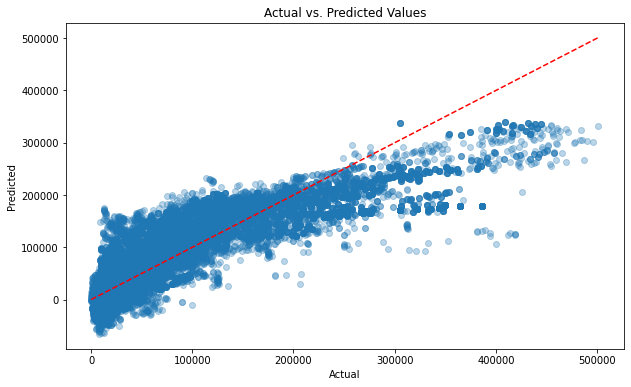

In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

# Assuming you have already run your OLS regression model
predictions = model.predict(X)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()



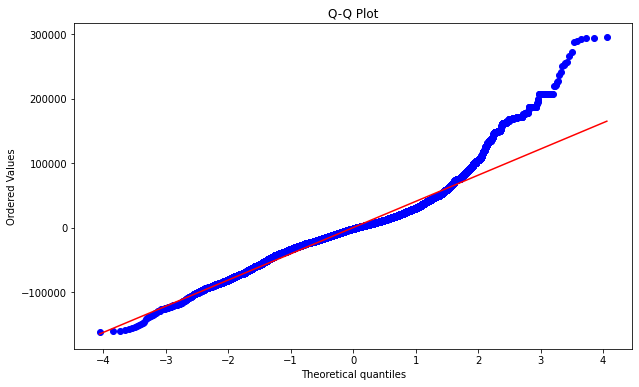

In [26]:
# Q-Q plot
residuals = y - predictions
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()



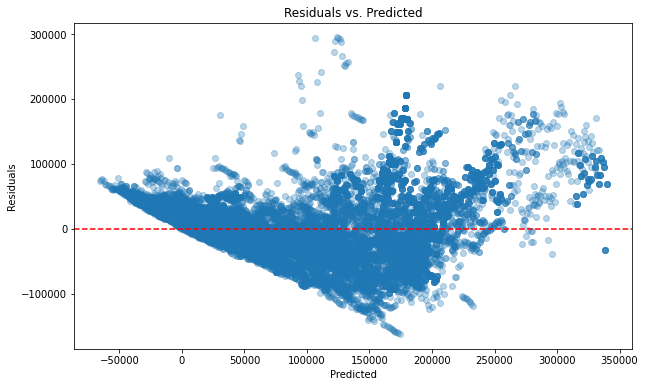

In [27]:
# Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


# AIC AND BIC 

In [28]:
# Calculate and display AIC and BIC
aic = model.aic
bic = model.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 681570.3101610411
BIC: 682502.3980637422


# Box-Cox Transformation

In [36]:
# Applying Box-Cox Transformation to the target variable
X = prty.drop('hg/ha_yield', axis=1)
y = prty['hg/ha_yield']

y_transformed, lambda_ = stats.boxcox(y)

# Continue with your existing preprocessing
cat_cols = ['Item', 'Area']  # Replace with your actual categorical columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

# Fit the OLS model with transformed y
model_box = sm.OLS(y_transformed, X_scaled).fit()


In [37]:
model_box.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1303.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:14:34   Log-Likelihood:                -22540.
No. Observations:               28242   AIC:                         4.531e+04
Df Residuals:                   28129   BIC:                         4.624e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7590      0.004   2629.888      0.000      11.750      11.768
x1             0.1173      0.003     34.898      0.000       0.111       0.124
x2             0.0422      0.006      6.783      0.000       0.030       0.054
x3          4.932e+11   6.86e+11      0.719      0.472   -8.51e+11    1.84e+12
x4             0.0029      0.011      0.253      0.800      -0.019       0.025
x5            -0.7120      0.005   -134.197      0.000      -0.722      -0.702
x6            -0.0197      0.004     -5.301      0.000      -0.027      -0.012
x7             0.0549      0.005     10.160      0.000       0.044       0.066
x8            -0.5320      0.005   -106.322      0.000      -0.542      -0.522
x9            -0.8444      0.005   -172.195      0.000      -0.854      -0.835
x10           -0.9028      0.005   -180.677      0.000      -0.913      -0.893
x11           -0.1320      0.005    -27.496      0.000      -0.141      -0.123
x12           -0.7679      0.005   -144.339      0.000      -0.778      -0.757
x13           -0.0428      0.004    -10.985      0.000      -0.050      -0.035
x14         6.151e+10   8.55e+10      0.719      0.472   -1.06e+11    2.29e+11
x15         2.508e+10   3.49e+10      0.719      0.472   -4.33e+10    9.34e+10
x16         7.045e+10   9.79e+10      0.719      0.472   -1.22e+11    2.62e+11
x17         3.026e+10   4.21e+10      0.719      0.472   -5.22e+10    1.13e+11
x18         1.201e+11   1.67e+11      0.719      0.472   -2.07e+11    4.47e+11
x19         1.517e+10   2.11e+10      0.719      0.472   -2.62e+10    5.65e+10
x20         4.613e+10   6.41e+10      0.719      0.472   -7.96e+10    1.72e+11
x21         6.525e+09   9.07e+09      0.719      0.472   -1.13e+10    2.43e+10
x22          3.12e+10   4.34e+10      0.719      0.472   -5.38e+10    1.16e+11
x23         -8.33e+10   1.16e+11     -0.719      0.472    -3.1e+11    1.44e+11
x24         2.842e+10   3.95e+10      0.719      0.472    -4.9e+10    1.06e+11
x25         1.646e+10   2.29e+10      0.719      0.472   -2.84e+10    6.13e+10
x26         3.532e+10   4.91e+10      0.719      0.472   -6.09e+10    1.32e+11
x27        -5.222e+10   7.26e+10     -0.719      0.472   -1.95e+11    9.01e+10
x28          4.25e+10   5.91e+10      0.719      0.472   -7.33e+10    1.58e+11
x29          4.12e+10   5.73e+10      0.719      0.472   -7.11e+10    1.53e+11
x30         1.251e+10   1.74e+10      0.719      0.472   -2.16e+10    4.66e+10
x31        -7.432e+09   1.03e+10     -0.719      0.472   -2.77e+10    1.28e+10
x32         9.119e+10   1.27e+11      0.719      0.472   -1.57e+11     3.4e+11
x33         7.481e+09   1.04e+10      0.719      0.472   -1.29e+10    2.79e+10
x34        -2.311e+09   3.21e+09     -0.719      0.472   -8.61e+09    3.99e+09
x35        -1.466e+11   2.04e+11     -0.719      0.472   -5.46e+11    2.53e+11
x3

# Comparing the Models 

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
predictions_model = model.predict(X)  # Assuming X is your feature matrix
predictions_model_box_transformed = model_box.predict(X)
#predictions_model_box = stats.boxcox(predictions_model_box_transformed, lambda_)


In [45]:
mse_model = mean_squared_error(y, predictions_model)
rmse_model = np.sqrt(mse_model)
r2_model = r2_score(y, predictions_model)

print("Original Model Metrics:")
print(f"RMSE: {rmse_model}")
print(f"MSE: {mse_model}")
print(f"R2: {r2_model}")


Original Model Metrics:
RMSE: 41926.306821540995
MSE: 1757815203.693995
R2: 0.7564465893861902


In [50]:
from scipy.special import inv_boxcox

# Assuming 'lambda_' is your Box-Cox transformation parameter
predictions_model_box_transformed = model_box.predict(X)
predictions_model_box_original_scale = inv_boxcox(predictions_model_box_transformed, lambda_)

# Now calculate the metrics
mse_model_box = mean_squared_error(y, predictions_model_box_original_scale)
rmse_model_box = np.sqrt(mse_model_box)
r2_model_box = r2_score(y, predictions_model_box_original_scale)

print("Box-Cox Transformed Model Metrics:")
print(f"RMSE: {rmse_model_box}")
print(f"MSE: {mse_model_box}")
print(f"R2: {r2_model_box}")


Box-Cox Transformed Model Metrics:
RMSE: 39750.86032828417
MSE: 1580130896.8387563
R2: 0.7810655702985192


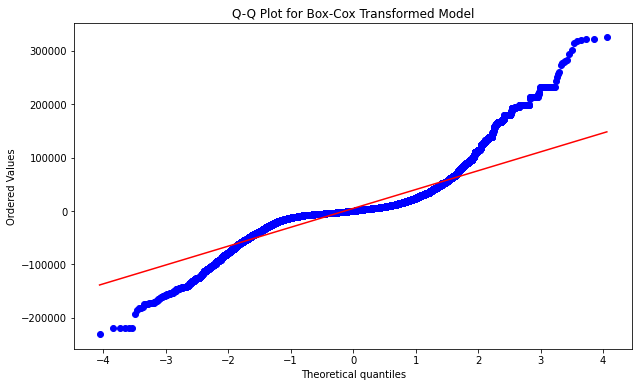

In [51]:
from scipy.special import inv_boxcox

# Assuming 'lambda_' is your Box-Cox transformation parameter
predictions_model_box_transformed = model_box.predict(X)
predictions_model_box_original_scale = inv_boxcox(predictions_model_box_transformed, lambda_)

# Calculate residuals
residuals_box = y - predictions_model_box_original_scale
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(residuals_box, dist="norm", plot=plt)
plt.title('Q-Q Plot for Box-Cox Transformed Model')
plt.show()


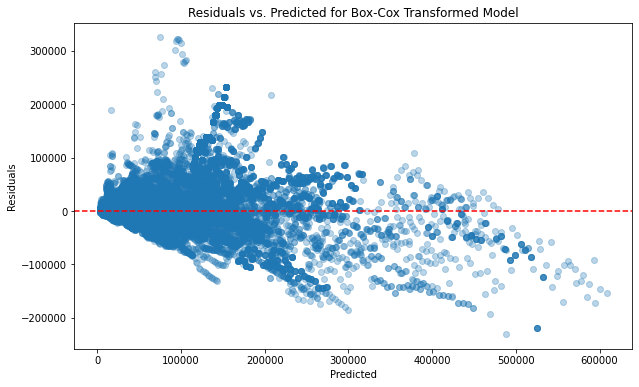

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_model_box_original_scale, residuals_box, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted for Box-Cox Transformed Model')
plt.show()


# Applying Random Forest  regression 

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and y are your features and target variable
# Fit the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

# Make predictions
predictions_rf = rf_regressor.predict(X)


In [60]:
mse_rf = mean_squared_error(y, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y, predictions_rf)

print("Random Forest Model Metrics:")
print(f"RMSE: {rmse_rf}")
print(f"MSE: {mse_rf}")
print(f"R2: {r2_rf}")


Random Forest Model Metrics:
RMSE: 3151.097601142271
MSE: 9929416.091924572
R2: 0.9986242335659006


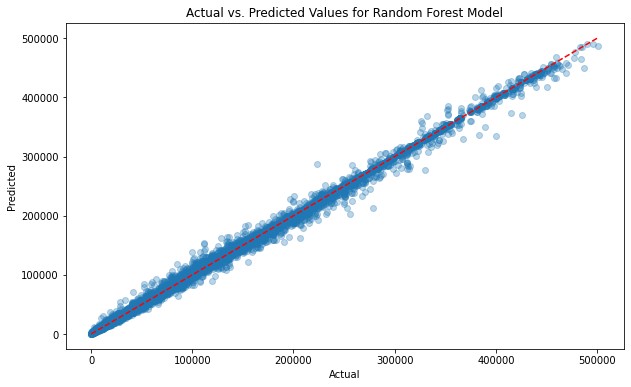

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values for Random Forest Model')
plt.show()


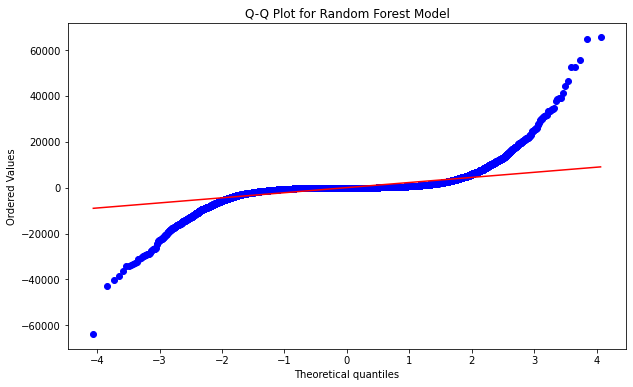

In [62]:
import scipy.stats as stats

residuals_rf = y - predictions_rf

plt.figure(figsize=(10, 6))
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title('Q-Q Plot for Random Forest Model')
plt.show()
